In [1]:
from data.json_formatter.JSONCreator import unir_jsons_con_formato
from src.evaluation.MetricsRunner import MetricsRunner
import matplotlib.pyplot as plt
import numpy as np

C:\Users\aaron\PycharmProjects\QwenTesting\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Cargar archivos JSON
BASE_PATH = r"C:\Users\aaron\Desktop\Final\base_qwen_inference.json"
FINETUNED_PATH = r"C:\Users\aaron\Desktop\Final\finetune_qwen_inference.json"
GOLD_PATH = r"C:\Users\aaron\Desktop\Examenes\JSON_fine_tuning\subset_finetune.json"

In [3]:
unir_jsons_con_formato(
    path_gt=GOLD_PATH,
    path_base=BASE_PATH,
    path_finetuned=FINETUNED_PATH,
    output_path=r"C:\Users\aaron\Desktop\Final\resultado_unificado.json"
)

[✓] Unificado con éxito (102 muestras). Guardado en: C:\Users\aaron\Desktop\Final\resultado_unificado.json


In [4]:
evaluator = MetricsRunner(BASE_PATH, FINETUNED_PATH, GOLD_PATH)
results = evaluator.evaluate()

Evaluando pares: 100%|██████████| 102/102 [00:25<00:00,  3.97it/s]


In [5]:
def avg_metric(results, model_key, metric_key, subkey=None):
    values = []
    for r in results:
        val = r[f"{model_key}_metrics"][metric_key]
        if isinstance(val, dict):
            if subkey:
                val = val[subkey]
            else:
                raise ValueError(f"La métrica '{metric_key}' requiere subkey.")
        values.append(val)
    print(values)
    return sum(values) / len(values)


metrics = {
    "BLEU": ("bleu", "bleu"),
    "ROUGE-L": ("rouge", "rougeL"),
    "BERTScore-F1": ("bertscore", "f1"),
    "Cosine": ("cosine", None)
}

avg_base = {}
avg_finetuned = {}
improvements = {}

for name, (mkey, skey) in metrics.items():
    base = avg_metric(results, "base", mkey, skey)
    fine = avg_metric(results, "finetuned", mkey, skey)
    avg_base[name] = base
    avg_finetuned[name] = fine
    improvements[name] = fine - base

print("🟩 Mejora del modelo fine-tuneado:")
for metric, delta in improvements.items():
    print(f"→ {metric}: +{delta:.4f}")


[0.0, 0.021539838023168112, 0.051572048032565064, 0.0297359055844923, 0.0, 0.0, 0.0, 0.04621139382863931, 0.0526140031424578, 0.0, 0.0, 0.01613524175173212, 0.0, 0.0, 0.0, 0.02161394061010797, 0.0, 0.0, 0.0, 0.0, 0.030283458667242774, 0.033845259528163474, 0.0, 0.037795579970673863, 0.03884715630481186, 0.0, 0.019754674811714095, 0.01574238464403689, 0.015176661072214897, 0.0, 0.0, 0.018357457100948795, 0.03758367144676243, 0.026164021698558967, 0.02437000724548223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009431596173036044, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01403931856217038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.04789852064401296, 0.02679825922853426, 0.1336007693302475, 0.03029572369148202, 0.051939291766476006, 0.023176719292866504, 0.0, 0.0, 0.0, 0.0295911619230649

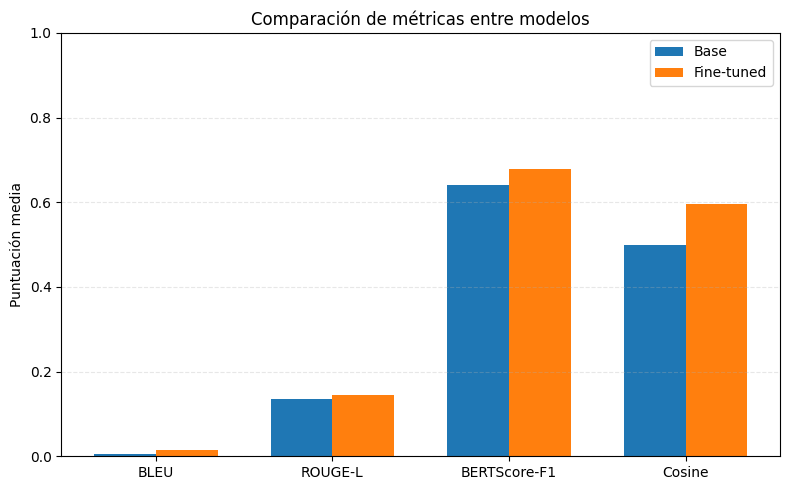

In [6]:
labels = list(improvements.keys())
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, [avg_base[m] for m in labels], width, label='Base')
bars2 = ax.bar(x + width/2, [avg_finetuned[m] for m in labels], width, label='Fine-tuned')

ax.set_ylabel('Puntuación media')
ax.set_title('Comparación de métricas entre modelos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()